In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyupbit
from sklearn import preprocessing

In [2]:
pyupbit.get_tickers(fiat='KRW')

['KRW-BTC',
 'KRW-ETH',
 'KRW-NEO',
 'KRW-MTL',
 'KRW-LTC',
 'KRW-XRP',
 'KRW-ETC',
 'KRW-OMG',
 'KRW-SNT',
 'KRW-WAVES',
 'KRW-XEM',
 'KRW-QTUM',
 'KRW-LSK',
 'KRW-STEEM',
 'KRW-XLM',
 'KRW-ARDR',
 'KRW-ARK',
 'KRW-STORJ',
 'KRW-GRS',
 'KRW-REP',
 'KRW-ADA',
 'KRW-SBD',
 'KRW-POWR',
 'KRW-BTG',
 'KRW-ICX',
 'KRW-EOS',
 'KRW-TRX',
 'KRW-SC',
 'KRW-ONT',
 'KRW-ZIL',
 'KRW-POLY',
 'KRW-ZRX',
 'KRW-LOOM',
 'KRW-BCH',
 'KRW-BAT',
 'KRW-IOST',
 'KRW-RFR',
 'KRW-CVC',
 'KRW-IQ',
 'KRW-IOTA',
 'KRW-MFT',
 'KRW-ONG',
 'KRW-GAS',
 'KRW-UPP',
 'KRW-ELF',
 'KRW-KNC',
 'KRW-BSV',
 'KRW-THETA',
 'KRW-QKC',
 'KRW-BTT',
 'KRW-MOC',
 'KRW-ENJ',
 'KRW-TFUEL',
 'KRW-MANA',
 'KRW-ANKR',
 'KRW-AERGO',
 'KRW-ATOM',
 'KRW-TT',
 'KRW-CRE',
 'KRW-MBL',
 'KRW-WAXP',
 'KRW-HBAR',
 'KRW-MED',
 'KRW-MLK',
 'KRW-STPT',
 'KRW-ORBS',
 'KRW-VET',
 'KRW-CHZ',
 'KRW-STMX',
 'KRW-DKA',
 'KRW-HIVE',
 'KRW-KAVA',
 'KRW-AHT',
 'KRW-LINK',
 'KRW-XTZ',
 'KRW-BORA',
 'KRW-JST',
 'KRW-CRO',
 'KRW-TON',
 'KRW-SXP',
 'KRW-HUNT',

# 비트코인(210101-211231)

In [3]:
ticker = 'KRW-BTC'
interval = 'day'
to = '2022-01-01'
count = 365
bitcoin = pd.DataFrame(pyupbit.get_ohlcv(ticker=ticker,interval=interval,to=to, count = count))

bitcoin.reset_index(inplace=True)
bitcoin = bitcoin.rename(columns={'index':'date'})

bitcoin= bitcoin.drop_duplicates(['date'])
bitcoin

,date,open,high,low,close,volume,value
0,2021-01-01 09:00:00,32037000.0,32599000.0,31800000.0,32296000.0,5752.494216,1.856139e+11
1,2021-01-02 09:00:00,32295000.0,36600000.0,31920000.0,35700000.0,17451.167678,6.023355e+11
2,2021-01-03 09:00:00,35700000.0,39453000.0,35500000.0,37537000.0,25381.506623,9.588751e+11
3,2021-01-04 09:00:00,37537000.0,38476000.0,33000000.0,36460000.0,23598.194590,8.472770e+11
4,2021-01-05 09:00:00,36478000.0,38590000.0,34357000.0,38093000.0,13461.981681,4.915540e+11
...,...,...,...,...,...,...,...
360,2021-12-27 09:00:00,61467000.0,62500000.0,60934000.0,61508000.0,5287.225194,3.255122e+11
361,2021-12-28 09:00:00,61470000.0,61508000.0,57912000.0,58274000.0,7303.087277,4.366198e+11
362,2021-12-29 09:00:00,58261000.0,58763000.0,56650000.0,57089000.0,8037.999545,4.650985e+11
363,2021-12-30 09:00:00,57089000.0,58233000.0,56400000.0,57200000.0,5506.789813,3.153787e+11


In [4]:
bitcoin = bitcoin.astype({'open': int, 'high': int, 'low': int, 'close':int})
bitcoin

,date,open,high,low,close,volume,value
0,2021-01-01 09:00:00,32037000,32599000,31800000,32296000,5752.494216,1.856139e+11
1,2021-01-02 09:00:00,32295000,36600000,31920000,35700000,17451.167678,6.023355e+11
2,2021-01-03 09:00:00,35700000,39453000,35500000,37537000,25381.506623,9.588751e+11
3,2021-01-04 09:00:00,37537000,38476000,33000000,36460000,23598.194590,8.472770e+11
4,2021-01-05 09:00:00,36478000,38590000,34357000,38093000,13461.981681,4.915540e+11
...,...,...,...,...,...,...,...
360,2021-12-27 09:00:00,61467000,62500000,60934000,61508000,5287.225194,3.255122e+11
361,2021-12-28 09:00:00,61470000,61508000,57912000,58274000,7303.087277,4.366198e+11
362,2021-12-29 09:00:00,58261000,58763000,56650000,57089000,8037.999545,4.650985e+11
363,2021-12-30 09:00:00,57089000,58233000,56400000,57200000,5506.789813,3.153787e+11


In [5]:
#bitcoin.to_csv("bitcoin_210101_211231.csv")

# 환율

In [6]:
exchange_rate = pd.read_csv('data/최종/환율_200102_211230.csv', names=['day', 'won'], encoding='cp949')
exchange_rate

,day,won
0,2021-01-01,"1,088.00"
1,2021-01-02,"1,088.00"
2,2021-01-03,"1,088.00"
3,2021-01-04,"1,088.00"
4,2021-01-05,"1,083.10"
...,...,...
360,2021-12-27,"1,186.40"
361,2021-12-28,"1,186.20"
362,2021-12-29,"1,186.70"
363,2021-12-30,"1,186.60"


In [7]:
def remove_comma(x):
    return x.replace(',', '')

exchange_rate['won'] = exchange_rate['won'].apply(remove_comma)
exchange_rate = exchange_rate.astype({'won': float})
exchange_rate

,day,won
0,2021-01-01,1088.0
1,2021-01-02,1088.0
2,2021-01-03,1088.0
3,2021-01-04,1088.0
4,2021-01-05,1083.1
...,...,...
360,2021-12-27,1186.4
361,2021-12-28,1186.2
362,2021-12-29,1186.7
363,2021-12-30,1186.6


In [8]:
bitcoin_exchange_rate = pd.concat([bitcoin, exchange_rate], axis=1)
bitcoin_exchange_rate.drop(bitcoin_exchange_rate.columns[[7]], axis=1, inplace=True)
bitcoin_exchange_rate

,date,open,high,low,close,volume,value,won
0,2021-01-01 09:00:00,32037000,32599000,31800000,32296000,5752.494216,1.856139e+11,1088.0
1,2021-01-02 09:00:00,32295000,36600000,31920000,35700000,17451.167678,6.023355e+11,1088.0
2,2021-01-03 09:00:00,35700000,39453000,35500000,37537000,25381.506623,9.588751e+11,1088.0
3,2021-01-04 09:00:00,37537000,38476000,33000000,36460000,23598.194590,8.472770e+11,1088.0
4,2021-01-05 09:00:00,36478000,38590000,34357000,38093000,13461.981681,4.915540e+11,1083.1
...,...,...,...,...,...,...,...,...
360,2021-12-27 09:00:00,61467000,62500000,60934000,61508000,5287.225194,3.255122e+11,1186.4
361,2021-12-28 09:00:00,61470000,61508000,57912000,58274000,7303.087277,4.366198e+11,1186.2
362,2021-12-29 09:00:00,58261000,58763000,56650000,57089000,8037.999545,4.650985e+11,1186.7
363,2021-12-30 09:00:00,57089000,58233000,56400000,57200000,5506.789813,3.153787e+11,1186.6


In [9]:
#bitcoin_exchange_rate.to_csv("bitcoin_exchange_rate.csv")

C:\Users\hmin0\AppData\Local\Temp/ipykernel_7608/1968108887.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1_ylabels)


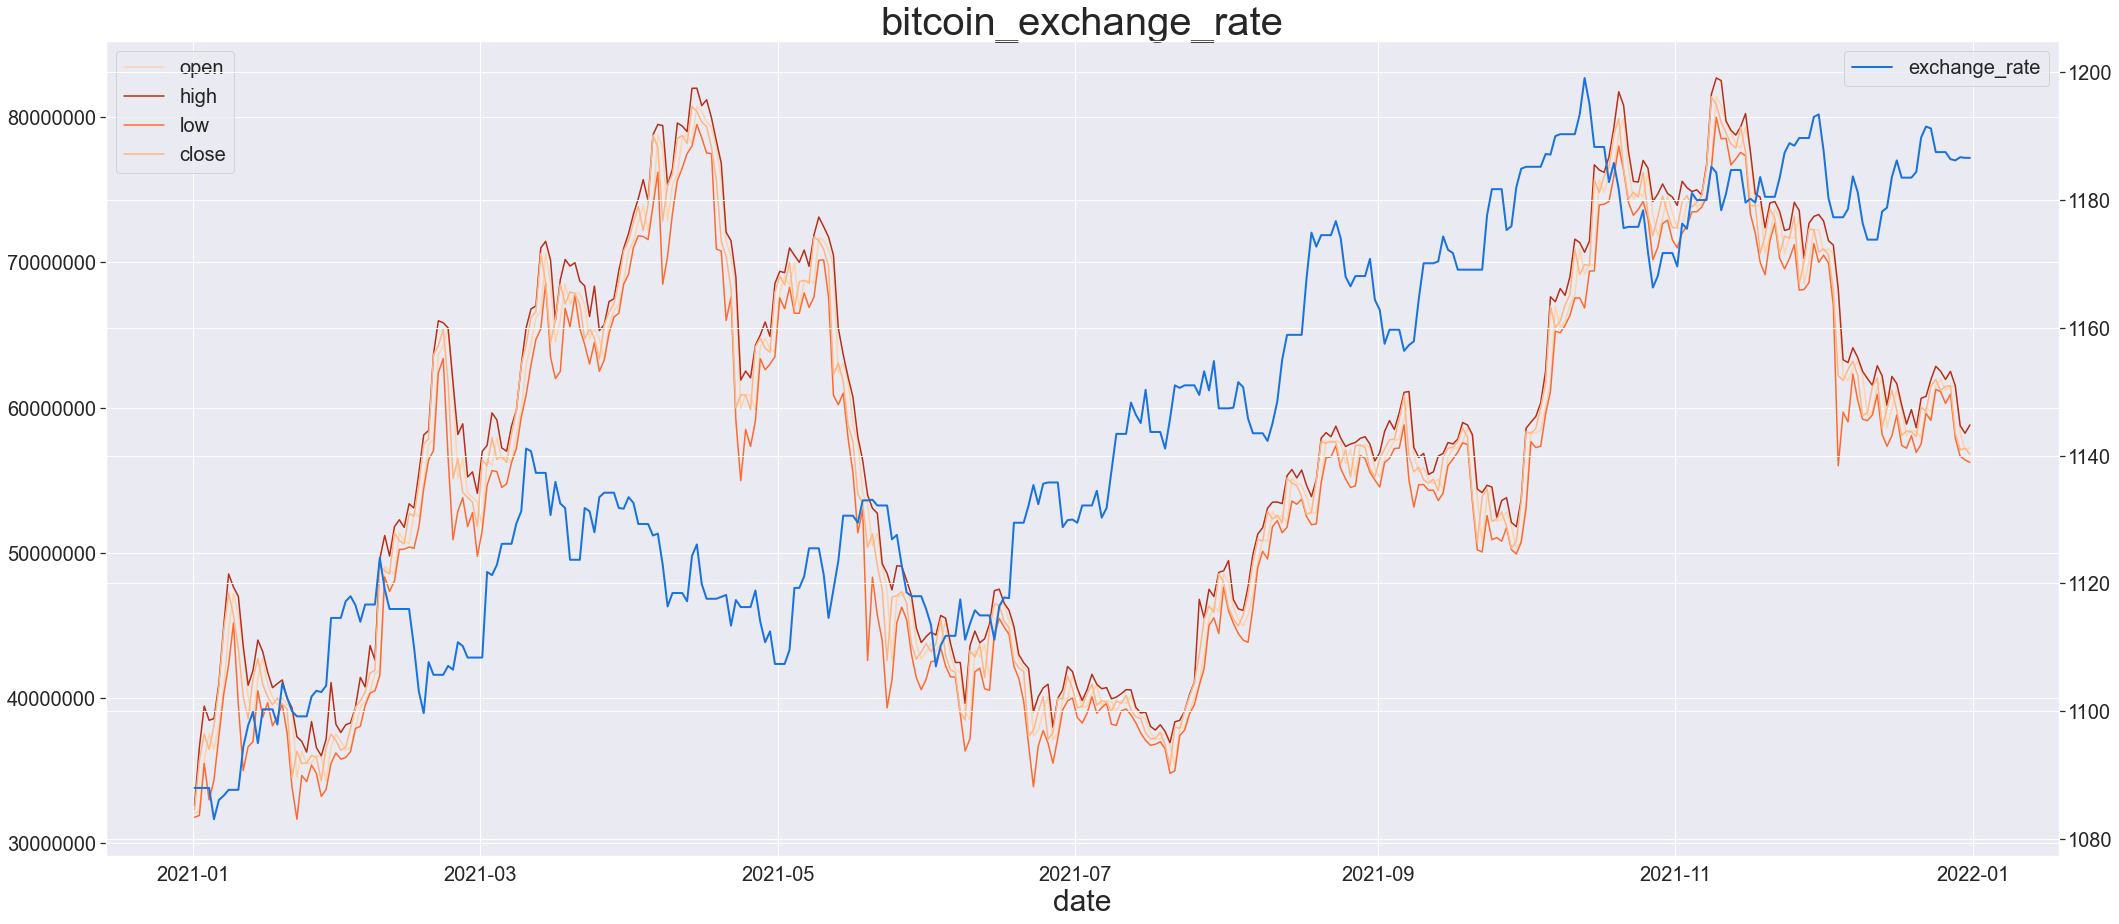

In [121]:
%matplotlib inline
x = btc_er_ir.date
y1 = btc_er_ir.open
y2 = btc_er_ir.high
y3 = btc_er_ir.low
y4 = btc_er_ir.close
y5= btc_er_ir.won

plt.rcParams['figure.figsize'] = (35, 15)

fig, ax1 = plt.subplots()
ax1.plot(x, y1, color='#FFD4AB', label='open')
ax1.plot(x, y2, color='#B72E16', label='high')
ax1.plot(x, y3, color='#FF692D', label='low')
ax1.plot(x, y4, color='#FFB681', label='close')
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)
ax1.set_xlabel('date', fontsize=30) 
#ax1.set_ylabel(['open', 'high', 'low', 'close'], fontsize=25) 
ax1.set_title('bitcoin_exchange_rate', fontsize=40)
ax1.legend(loc=2, fontsize=20)
ax1_ylabels = ["", 30000000, 40000000, 50000000, 60000000, 70000000, 80000000]
ax1.set_yticklabels(ax1_ylabels)

ax2= ax1.twinx()
ax2.plot(x, y5, color='#1973DF', linewidth=2.0, label='exchange_rate')
ax2.tick_params(axis='y',labelsize=20)
ax2.legend(loc=1, fontsize=20)
#ax2.set_ylim([1083.10, 1199.10 ]) #수정필요
#plt.savefig('bitcoin_exchange_rate.png', facecolor='#eeeeee')
plt.show()

# 금리

In [107]:
interest_rate=pd.read_csv('data/최종/기준금리_200102_211230.csv', names=['day', 'percent'], encoding='cp949')
interest_rate=interest_rate.drop(0)
interest_rate.reset_index(drop=True, inplace=True)
interest_rate

,day,percent
0,2021/01/01,0.50
1,2021/01/02,0.50
2,2021/01/03,0.50
3,2021/01/04,0.50
4,2021/01/05,0.50
...,...,...
360,2021/12/27,1.00
361,2021/12/28,1.00
362,2021/12/29,1.00
363,2021/12/30,1.00


In [108]:
bitcoin_interest_rate= pd.concat([bitcoin, interest_rate], axis=1)
bitcoin_interest_rate.drop(bitcoin_interest_rate.columns[[7]], axis=1, inplace=True)

bitcoin_interest_rate

,date,open,high,low,close,volume,value,percent
0,2021-01-01 09:00:00,32037000,32599000,31800000,32296000,5752.494216,1.856139e+11,0.50
1,2021-01-02 09:00:00,32295000,36600000,31920000,35700000,17451.167678,6.023355e+11,0.50
2,2021-01-03 09:00:00,35700000,39453000,35500000,37537000,25381.506623,9.588751e+11,0.50
3,2021-01-04 09:00:00,37537000,38476000,33000000,36460000,23598.194590,8.472770e+11,0.50
4,2021-01-05 09:00:00,36478000,38590000,34357000,38093000,13461.981681,4.915540e+11,0.50
...,...,...,...,...,...,...,...,...
360,2021-12-27 09:00:00,61467000,62500000,60934000,61508000,5287.225194,3.255122e+11,1.00
361,2021-12-28 09:00:00,61470000,61508000,57912000,58274000,7303.087277,4.366198e+11,1.00
362,2021-12-29 09:00:00,58261000,58763000,56650000,57089000,8037.999545,4.650985e+11,1.00
363,2021-12-30 09:00:00,57089000,58233000,56400000,57200000,5506.789813,3.153787e+11,1.00


In [109]:
bitcoin_interest_rate.drop(bitcoin_interest_rate.columns[[5,6]], axis=1, inplace=True)
bitcoin_interest_rate

,date,open,high,low,close,percent
0,2021-01-01 09:00:00,32037000,32599000,31800000,32296000,0.50
1,2021-01-02 09:00:00,32295000,36600000,31920000,35700000,0.50
2,2021-01-03 09:00:00,35700000,39453000,35500000,37537000,0.50
3,2021-01-04 09:00:00,37537000,38476000,33000000,36460000,0.50
4,2021-01-05 09:00:00,36478000,38590000,34357000,38093000,0.50
...,...,...,...,...,...,...
360,2021-12-27 09:00:00,61467000,62500000,60934000,61508000,1.00
361,2021-12-28 09:00:00,61470000,61508000,57912000,58274000,1.00
362,2021-12-29 09:00:00,58261000,58763000,56650000,57089000,1.00
363,2021-12-30 09:00:00,57089000,58233000,56400000,57200000,1.00


In [112]:
btc_ir = bitcoin_interest_rate.drop(bitcoin_interest_rate.columns[[1,2,3,4]], axis=1, inplace=True)

In [114]:
btc_er = bitcoin_exchange_rate.drop(bitcoin_exchange_rate.columns[[5,6]], axis=1, inplace=True)

In [117]:
bitcoin_exchange_rate.set_index("date", drop=True, inplace=True)
bitcoin_interest_rate.set_index("date", drop=True, inplace=True)

In [118]:
btc_er_ir = pd.concat([bitcoin_exchange_rate, bitcoin_interest_rate], axis=1)
btc_er_ir

,open,high,low,close,won,percent
date,,,,,,
2021-01-01 09:00:00,32037000,32599000,31800000,32296000,1088.0,0.50
2021-01-02 09:00:00,32295000,36600000,31920000,35700000,1088.0,0.50
2021-01-03 09:00:00,35700000,39453000,35500000,37537000,1088.0,0.50
2021-01-04 09:00:00,37537000,38476000,33000000,36460000,1088.0,0.50
2021-01-05 09:00:00,36478000,38590000,34357000,38093000,1083.1,0.50
...,...,...,...,...,...,...
2021-12-27 09:00:00,61467000,62500000,60934000,61508000,1186.4,1.00
2021-12-28 09:00:00,61470000,61508000,57912000,58274000,1186.2,1.00
2021-12-29 09:00:00,58261000,58763000,56650000,57089000,1186.7,1.00


In [119]:
btc_er_ir.reset_index(level=0, inplace=True)
btc_er_ir

,date,open,high,low,close,won,percent
0,2021-01-01 09:00:00,32037000,32599000,31800000,32296000,1088.0,0.50
1,2021-01-02 09:00:00,32295000,36600000,31920000,35700000,1088.0,0.50
2,2021-01-03 09:00:00,35700000,39453000,35500000,37537000,1088.0,0.50
3,2021-01-04 09:00:00,37537000,38476000,33000000,36460000,1088.0,0.50
4,2021-01-05 09:00:00,36478000,38590000,34357000,38093000,1083.1,0.50
...,...,...,...,...,...,...,...
360,2021-12-27 09:00:00,61467000,62500000,60934000,61508000,1186.4,1.00
361,2021-12-28 09:00:00,61470000,61508000,57912000,58274000,1186.2,1.00
362,2021-12-29 09:00:00,58261000,58763000,56650000,57089000,1186.7,1.00
363,2021-12-30 09:00:00,57089000,58233000,56400000,57200000,1186.6,1.00


In [123]:
#btc_er_ir.to_csv("data/final/btc_er_ir.csv")

In [111]:
#bitcoin_interest_rate.to_csv("data/final/bitcoin_interest_rate.csv")

C:\Users\hmin0\AppData\Local\Temp/ipykernel_7608/3549146376.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1_ylabels)


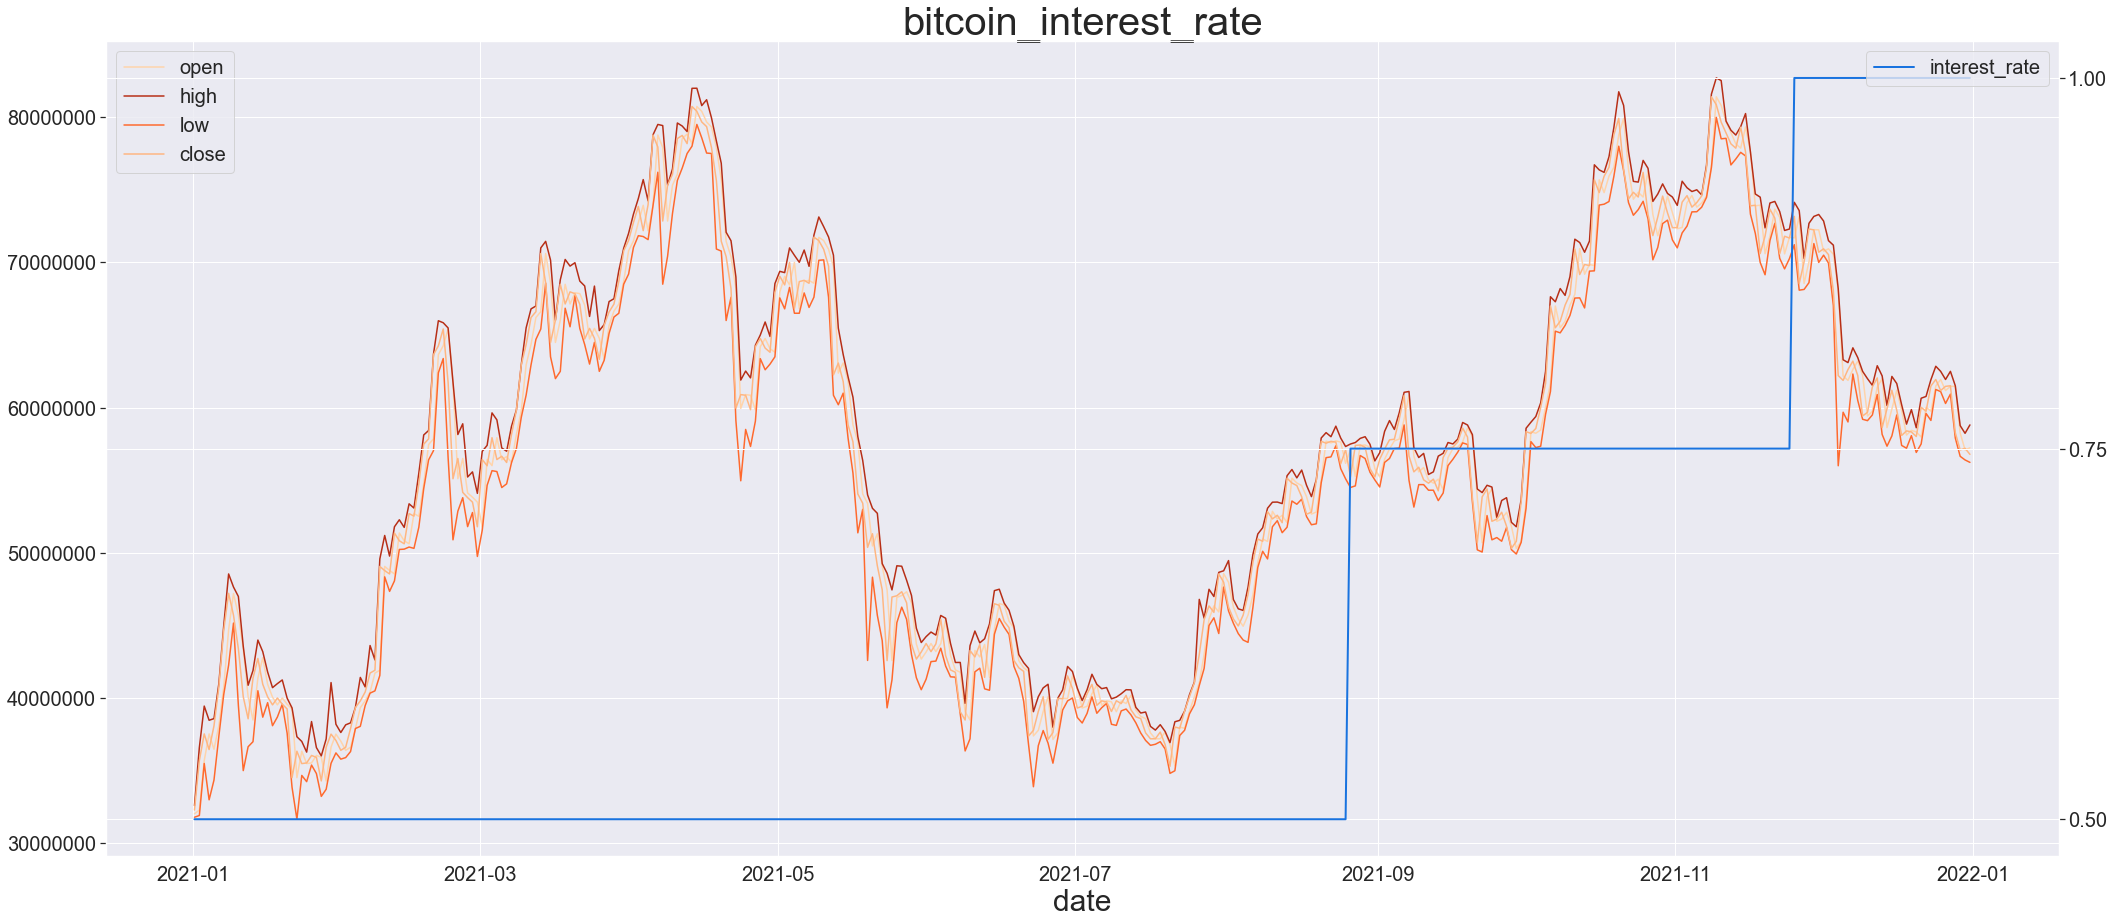

In [120]:
%matplotlib inline

x = btc_er_ir.date
y1 = btc_er_ir.open
y2 = btc_er_ir.high
y3 = btc_er_ir.low
y4 = btc_er_ir.close
y5= btc_er_ir.percent

plt.rcParams['figure.figsize'] = (35, 15)
fig, ax1 = plt.subplots()

ax1.plot(x, y1, color='#FFD4AB', label='open')
ax1.plot(x, y2, color='#B72E16', label='high')
ax1.plot(x, y3, color='#FF692D', label='low')
ax1.plot(x, y4, color='#FFB681', label='close')
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)
ax1.set_xlabel('date', fontsize=30) 
#ax1.set_ylabel(['open', 'high', 'low', 'close'], fontsize=25) 
ax1.set_title('bitcoin_interest_rate', fontsize=40)
ax1.legend(loc=2, fontsize=20)
ax1_ylabels = ["", 30000000, 40000000, 50000000, 60000000, 70000000, 80000000]
ax1.set_yticklabels(ax1_ylabels)

ax2= ax1.twinx()
ax2.plot(x, y5, color='#1973DF', linewidth=2.0, label='interest_rate')
ax2.tick_params(axis='y',labelsize=20)
ax2.legend(loc=1, fontsize=20)
#ax2_yticks= [i for i in range(0.5, 1.0)]
#ax2.set_ylim(["", 0.50, 0.75, 1.00]) #수정필요

plt.show()

# 일일손익률

In [16]:
btc= bitcoin[["date", "close"]]
btc.set_index("date", drop=True, inplace=True)
btc.head()

,close
date,
2021-01-01 09:00:00,32296000
2021-01-02 09:00:00,35700000
2021-01-03 09:00:00,37537000
2021-01-04 09:00:00,36460000
2021-01-05 09:00:00,38093000


In [17]:
btc["dr"] = btc["close"].pct_change()
btc

C:\Users\hmin0\AppData\Local\Temp/ipykernel_7608/2396192272.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc["dr"] = btc["close"].pct_change()


,close,dr
date,,
2021-01-01 09:00:00,32296000,NaN
2021-01-02 09:00:00,35700000,0.105400
2021-01-03 09:00:00,37537000,0.051457
2021-01-04 09:00:00,36460000,-0.028692
2021-01-05 09:00:00,38093000,0.044789
...,...,...
2021-12-27 09:00:00,61508000,0.000667
2021-12-28 09:00:00,58274000,-0.052579
2021-12-29 09:00:00,57089000,-0.020335


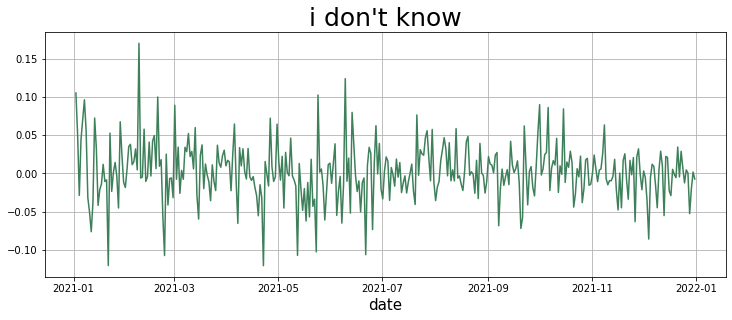

In [18]:
plt.figure(figsize=(12.2, 4.5))
plt.plot(btc.index, btc["dr"], '#3d805a')
plt.title("i don't know", fontsize=25)
plt.xlabel("date", fontsize=15)
plt.grid(True)
#plt.xticks(["2021-01", "2021-02", "2021-03", "2021-04", "2021-05", "2021-06", "2021-07",
          # "2021-08", "2021-09", "2021-10", "2021-11", "2021-12"])
#plt.legend(["daily_return"], prop={'size': 10})
plt.show()

# 일일 누적 손익률

In [19]:
btc["dcsr"] = (btc["dr"]+1).cumprod()-1
btc

C:\Users\hmin0\AppData\Local\Temp/ipykernel_7608/4186416188.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc["dcsr"] = (btc["dr"]+1).cumprod()-1


,close,dr,dcsr
date,,,
2021-01-01 09:00:00,32296000,NaN,NaN
2021-01-02 09:00:00,35700000,0.105400,0.105400
2021-01-03 09:00:00,37537000,0.051457,0.162280
2021-01-04 09:00:00,36460000,-0.028692,0.128932
2021-01-05 09:00:00,38093000,0.044789,0.179496
...,...,...,...
2021-12-27 09:00:00,61508000,0.000667,0.904508
2021-12-28 09:00:00,58274000,-0.052579,0.804372
2021-12-29 09:00:00,57089000,-0.020335,0.767680


In [20]:
#btc.to_csv("btc.csv")

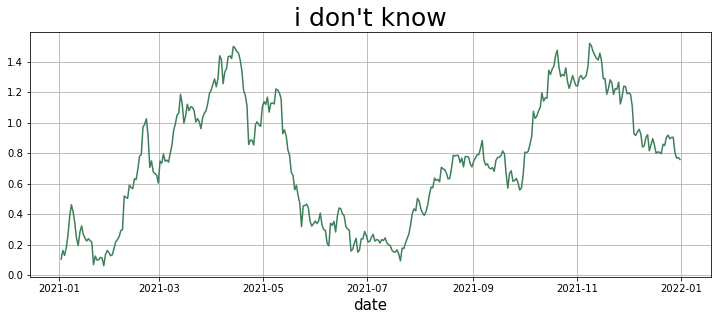

In [21]:
plt.figure(figsize=(12.2, 4.5))
plt.plot(btc.index, btc["dcsr"], '#3d805a')
plt.title("i don't know", fontsize=25)
plt.xlabel("date", fontsize=15)
plt.grid(True)
#plt.plot("2021-11", marker='$Z$')
plt.show()

## 비트코인VS이더리움

In [27]:
sample = pd.read_csv("data/최종/ethereum_210101_211231.csv", index_col=0)
#sample = sample.drop(sample.columns[0])
sample

,date,open,high,low,close,volume,value
0,2021-01-01 09:00:00,815100.0,826600.0,793600.0,803000.0,9.474003e+04,7.704969e+10
1,2021-01-02 09:00:00,802900.0,865400.0,789000.0,858700.0,2.313476e+05,1.931445e+11
2,2021-01-03 09:00:00,858700.0,1144000.0,855000.0,1113500.0,7.478431e+05,7.474054e+11
3,2021-01-04 09:00:00,1114000.0,1335500.0,1035000.0,1189000.0,1.434144e+06,1.662490e+12
4,2021-01-05 09:00:00,1190000.0,1293500.0,1120500.0,1236000.0,7.358599e+05,8.827894e+11
...,...,...,...,...,...,...,...
360,2021-12-27 09:00:00,4917000.0,4957000.0,4864000.0,4896000.0,2.661636e+04,1.307935e+11
361,2021-12-28 09:00:00,4896000.0,4899000.0,4630000.0,4650000.0,4.759861e+04,2.266827e+11
362,2021-12-29 09:00:00,4650000.0,4682000.0,4423000.0,4456000.0,4.510187e+04,2.066389e+11
363,2021-12-30 09:00:00,4457000.0,4578000.0,4402000.0,4506000.0,3.570867e+04,1.605427e+11


In [28]:
sample= sample.set_index("date")
sample

,open,high,low,close,volume,value
date,,,,,,
2021-01-01 09:00:00,815100.0,826600.0,793600.0,803000.0,9.474003e+04,7.704969e+10
2021-01-02 09:00:00,802900.0,865400.0,789000.0,858700.0,2.313476e+05,1.931445e+11
2021-01-03 09:00:00,858700.0,1144000.0,855000.0,1113500.0,7.478431e+05,7.474054e+11
2021-01-04 09:00:00,1114000.0,1335500.0,1035000.0,1189000.0,1.434144e+06,1.662490e+12
2021-01-05 09:00:00,1190000.0,1293500.0,1120500.0,1236000.0,7.358599e+05,8.827894e+11
...,...,...,...,...,...,...
2021-12-27 09:00:00,4917000.0,4957000.0,4864000.0,4896000.0,2.661636e+04,1.307935e+11
2021-12-28 09:00:00,4896000.0,4899000.0,4630000.0,4650000.0,4.759861e+04,2.266827e+11
2021-12-29 09:00:00,4650000.0,4682000.0,4423000.0,4456000.0,4.510187e+04,2.066389e+11


In [29]:
sample = sample.drop(["open","high","low", "volume", "value"], axis=1)
sample

,close
date,
2021-01-01 09:00:00,803000.0
2021-01-02 09:00:00,858700.0
2021-01-03 09:00:00,1113500.0
2021-01-04 09:00:00,1189000.0
2021-01-05 09:00:00,1236000.0
...,...
2021-12-27 09:00:00,4896000.0
2021-12-28 09:00:00,4650000.0
2021-12-29 09:00:00,4456000.0


In [31]:
sample1 = pd.read_csv("data/최종/bitcoin_210101_211231.csv")
sample1 = sample1.drop(sample1.columns[0], axis=1)
sample1

,date,open,high,low,close,volume,value
0,2021-01-01 09:00:00,32037000.0,32599000.0,31800000.0,32296000.0,5752.494216,1.856139e+11
1,2021-01-02 09:00:00,32295000.0,36600000.0,31920000.0,35700000.0,17451.167678,6.023355e+11
2,2021-01-03 09:00:00,35700000.0,39453000.0,35500000.0,37537000.0,25381.506623,9.588751e+11
3,2021-01-04 09:00:00,37537000.0,38476000.0,33000000.0,36460000.0,23598.194590,8.472770e+11
4,2021-01-05 09:00:00,36478000.0,38590000.0,34357000.0,38093000.0,13461.981681,4.915540e+11
...,...,...,...,...,...,...,...
360,2021-12-27 09:00:00,61467000.0,62500000.0,60934000.0,61508000.0,5287.225194,3.255122e+11
361,2021-12-28 09:00:00,61470000.0,61508000.0,57912000.0,58274000.0,7303.087277,4.366198e+11
362,2021-12-29 09:00:00,58261000.0,58763000.0,56650000.0,57089000.0,8037.999545,4.650985e+11
363,2021-12-30 09:00:00,57089000.0,58233000.0,56400000.0,57200000.0,5506.789813,3.153787e+11


In [32]:
sample1= sample1.set_index("date")
sample1 = sample1.drop(["open","high","low", "volume", "value"], axis=1)
sample1

,close
date,
2021-01-01 09:00:00,32296000.0
2021-01-02 09:00:00,35700000.0
2021-01-03 09:00:00,37537000.0
2021-01-04 09:00:00,36460000.0
2021-01-05 09:00:00,38093000.0
...,...
2021-12-27 09:00:00,61508000.0
2021-12-28 09:00:00,58274000.0
2021-12-29 09:00:00,57089000.0


In [33]:
btc_eth = pd.concat([sample, sample1], axis=1)
btc_eth

,close,close
date,,
2021-01-01 09:00:00,803000.0,32296000.0
2021-01-02 09:00:00,858700.0,35700000.0
2021-01-03 09:00:00,1113500.0,37537000.0
2021-01-04 09:00:00,1189000.0,36460000.0
2021-01-05 09:00:00,1236000.0,38093000.0
...,...,...
2021-12-27 09:00:00,4896000.0,61508000.0
2021-12-28 09:00:00,4650000.0,58274000.0
2021-12-29 09:00:00,4456000.0,57089000.0


In [34]:
btc_eth.columns = ['eth', 'btc']
btc_eth

,eth,btc
date,,
2021-01-01 09:00:00,803000.0,32296000.0
2021-01-02 09:00:00,858700.0,35700000.0
2021-01-03 09:00:00,1113500.0,37537000.0
2021-01-04 09:00:00,1189000.0,36460000.0
2021-01-05 09:00:00,1236000.0,38093000.0
...,...,...
2021-12-27 09:00:00,4896000.0,61508000.0
2021-12-28 09:00:00,4650000.0,58274000.0
2021-12-29 09:00:00,4456000.0,57089000.0


In [35]:
btc_eth.columns.names = ["close"]
btc_eth

close,eth,btc
date,,
2021-01-01 09:00:00,803000.0,32296000.0
2021-01-02 09:00:00,858700.0,35700000.0
2021-01-03 09:00:00,1113500.0,37537000.0
2021-01-04 09:00:00,1189000.0,36460000.0
2021-01-05 09:00:00,1236000.0,38093000.0
...,...,...
2021-12-27 09:00:00,4896000.0,61508000.0
2021-12-28 09:00:00,4650000.0,58274000.0
2021-12-29 09:00:00,4456000.0,57089000.0


In [36]:
btc_eth.index = btc_eth.index.str.replace(" 09:00:00", "")
btc_eth

close,eth,btc
date,,
2021-01-01,803000.0,32296000.0
2021-01-02,858700.0,35700000.0
2021-01-03,1113500.0,37537000.0
2021-01-04,1189000.0,36460000.0
2021-01-05,1236000.0,38093000.0
...,...,...
2021-12-27,4896000.0,61508000.0
2021-12-28,4650000.0,58274000.0
2021-12-29,4456000.0,57089000.0


In [103]:
#btc_eth.to_csv("data/final/btc_eth.csv")

<AxesSubplot:xlabel='date'>

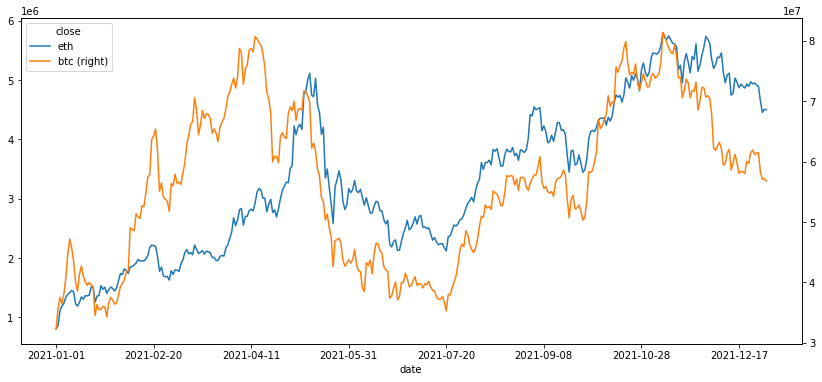

In [37]:
btc_eth.plot(secondary_y='btc', figsize=(14,6))

### 그러나 주식 데이터에 대한 회귀 분석은 절대 종가 대신 수익률에 의존합니다. 여기서 우리는 AAPL과 MSFT 사이의 로그 수익률을 조사하고 비교할 것입니다.

array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
      dtype=object)

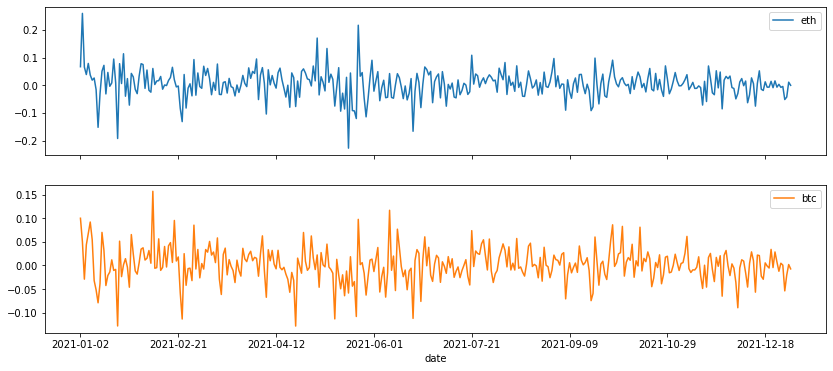

In [38]:
returns = np.log(btc_eth/ btc_eth.shift(1))
returns.dropna(inplace=True)
returns.plot(subplots=True, figsize=(14,6))

### 또한 Pandas scatter_matrix 메서드를 사용 하여 히스토그램을 통해 AAPL과 MSFT의 변동성 패턴을 시각화 할 수 있습니다 .

array([[<AxesSubplot:xlabel='eth', ylabel='eth'>,
        <AxesSubplot:xlabel='btc', ylabel='eth'>],
       [<AxesSubplot:xlabel='eth', ylabel='btc'>,
        <AxesSubplot:xlabel='btc', ylabel='btc'>]], dtype=object)

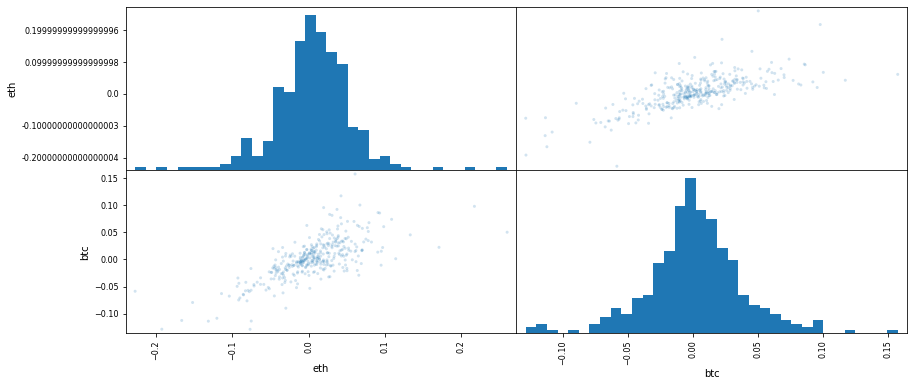

In [39]:
pd.plotting.scatter_matrix(returns, alpha=0.2, diagonal='hist', hist_kwds={'bins': 35}, figsize=(14,6))

### 수익률에 대한 일반적인 최소 제곱 (OLS) 회귀 분석을 수행 할 준비가되었습니다. 이 목표를 달성하기 위해 Numpy polyfit 및 polyval 방법을 사용합니다 .

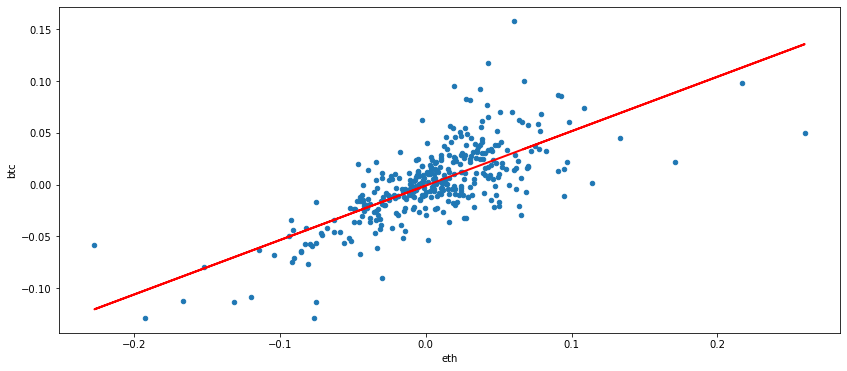

In [40]:
regression = np.polyfit(returns['eth'], returns['btc'], deg=1)

ax = returns.plot(kind='scatter', x= 'eth', y='btc', figsize=(14,6))
ax.plot(returns['eth'], np.polyval(regression, returns['eth']), 'r', lw=2)

### 회귀선의 기울기는 양수이며 이는 위에서 언급 한 AAPL과 MSFT의 양의 상관 관계를 가정하는 데 도움이됩니다.

### 마지막으로 두 가지 관점에서 상관 관계 측정을 살펴 보겠습니다. 첫 번째 관점은 전체 데이터 세트를 고려하는 정적 상관 관계를 조사하는 것이고 다른 관점은 시간 경과에 따른 고정 창에 대한 롤링 상관 관계를 조사하는 것입니다.

In [41]:
returns.corr()

close,eth,btc
close,,
eth,1.000000,0.714529
btc,0.714529,1.000000


### 이제 우리는 데이터 프레임의 내장 된 롤링 방법을 사용하여 롤링 상관 관계를 진행할 것 입니다.창 크기 20 일 (약 1 개월 거래일) 및 MSFT 수익률과의 상관 관계로 APPL의 롤링 수익률을 계산합니다. 마지막으로 결과를 선형 차트로 플로팅합니다.정적 상관 값을 동일한 차트 그림에 수평선으로 표시합니다.

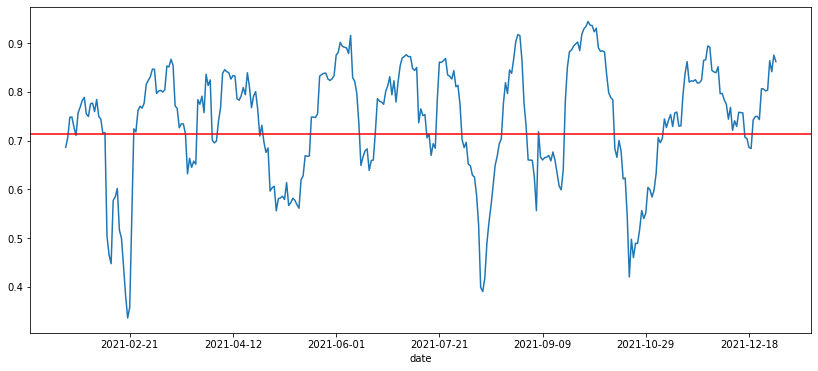

In [42]:
ax = returns['eth'].rolling(window=20).corr(returns['btc']).plot(figsize=(14,6))
ax.axhline(returns.corr().iloc[0,1], c='r')

### 위의 그림에서 AAPL과 MSFT 사이의 상관 관계는 시간이 지남에 따라 변하지 만 항상 양수임을 알 수 있습니다. AAPL과 MSFT 사이의 상관 관계는 강력한 양의 상관 관계가 있다는 결론을 내릴 수 있습니다.

# 여러지수와 비교

In [43]:
btc_sample = pd.read_csv("data/최종/bitcoin_210101_211231.csv")
btc_sample = btc_sample.drop(btc_sample.columns[0], axis=1)
btc_sample= btc_sample.set_index("date")
btc_sample = btc_sample.drop(["open","high","low", "volume", "value"], axis=1)
btc_sample.index = btc_sample.index.str.replace(" 09:00:00", "")
btc_sample.columns = ['btc']
btc_sample

,btc
date,
2021-01-01,32296000.0
2021-01-02,35700000.0
2021-01-03,37537000.0
2021-01-04,36460000.0
2021-01-05,38093000.0
...,...
2021-12-27,61508000.0
2021-12-28,58274000.0
2021-12-29,57089000.0


In [44]:
kospi = pd.read_csv("data/최종/KOSPI&KOSDAQ.csv")
kospi = kospi.set_index("date")
kospi.index = pd.DatetimeIndex(kospi.index)
kospi = kospi.reindex(pd.date_range("2020-12-30", "2021-12-31"))
kospi = kospi.fillna(method='ffill')

In [45]:
kospi.index.name = 'date'
kospi = kospi.drop(index=["2020-12-30", "2020-12-31"])
kospi.drop("KOSDAQ", axis=1, inplace=True)
kospi

,KOSPI
date,
2021-01-01,2873.47
2021-01-02,2873.47
2021-01-03,2873.47
2021-01-04,2944.45
2021-01-05,2990.57
...,...
2021-12-27,2999.55
2021-12-28,3020.24
2021-12-29,2993.29


In [46]:
#kospi.to_csv("data/최종/kospi_2021.csv")

In [47]:
kospi

,KOSPI
date,
2021-01-01,2873.47
2021-01-02,2873.47
2021-01-03,2873.47
2021-01-04,2944.45
2021-01-05,2990.57
...,...
2021-12-27,2999.55
2021-12-28,3020.24
2021-12-29,2993.29


In [48]:
nasdaq = pd.read_csv("data/최종/NASDAQCOM.csv")
nasdaq = nasdaq.set_index("date")
nasdaq.index = pd.DatetimeIndex(nasdaq.index)
nasdaq = nasdaq.reindex(pd.date_range("2020-12-30", "2021-12-31"))
nasdaq = nasdaq.fillna(method='ffill')
nasdaq = nasdaq.fillna(method='bfill')

In [49]:
nasdaq.index.name = 'date'
nasdaq = nasdaq.drop(index=["2020-12-30", "2020-12-31"])
nasdaq

,NASDAQ
date,
2021-01-01,12698.45
2021-01-02,12698.45
2021-01-03,12698.45
2021-01-04,12698.45
2021-01-05,12818.96
...,...
2021-12-27,15871.26
2021-12-28,15781.72
2021-12-29,15766.22


In [50]:
nasdaq.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2021-01-01 to 2021-12-31
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   NASDAQ  365 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


In [51]:
#nasdaq.to_csv("data/최종/nasdaq_2021.csv")

In [52]:
sp500 = pd.read_csv("data/최종/SP500.csv")
sp500 = sp500.set_index("date")
sp500.index = pd.DatetimeIndex(sp500.index)
sp500 = sp500.reindex(pd.date_range("2020-12-30", "2021-12-31"))
sp500 = sp500.fillna(method='ffill')
sp500 = sp500.fillna(method='bfill')

In [53]:
sp500.index.name = 'date'
sp500 = sp500.drop(index=["2020-12-30", "2020-12-31"])
sp500

,SP500
date,
2021-01-01,3700.65
2021-01-02,3700.65
2021-01-03,3700.65
2021-01-04,3700.65
2021-01-05,3726.86
...,...
2021-12-27,4791.19
2021-12-28,4786.35
2021-12-29,4793.06


In [54]:
#sp500.to_csv("data/최종/sp500_2021.csv")

In [55]:
total = pd.concat([kospi, nasdaq, sp500], axis=1)
total

,KOSPI,NASDAQ,SP500
date,,,
2021-01-01,2873.47,12698.45,3700.65
2021-01-02,2873.47,12698.45,3700.65
2021-01-03,2873.47,12698.45,3700.65
2021-01-04,2944.45,12698.45,3700.65
2021-01-05,2990.57,12818.96,3726.86
...,...,...,...
2021-12-27,2999.55,15871.26,4791.19
2021-12-28,3020.24,15781.72,4786.35
2021-12-29,2993.29,15766.22,4793.06


In [56]:
i_rate= pd.read_csv("data/최종/기준금리_200102_211230.csv", names=['date', 'irate'], encoding='cp949')
i_rate=i_rate.drop(index=0)
i_rate = i_rate.set_index("date")
i_rate.index = i_rate.index.str.replace("/", "-")
i_rate = i_rate.apply(pd.to_numeric)
i_rate

,irate
date,
2021-01-01,0.5
2021-01-02,0.5
2021-01-03,0.5
2021-01-04,0.5
2021-01-05,0.5
...,...
2021-12-27,1.0
2021-12-28,1.0
2021-12-29,1.0


In [57]:
#i_rate.to_csv("data/최종/irate_2021.csv")

In [58]:
e_rate= pd.read_csv("data/최종/환율_200102_211230.csv", names=['date', 'erate'], encoding='cp949')
e_rate = e_rate.set_index("date")
e_rate.index = e_rate.index.str.replace("/", "-")
e_rate["erate"] = e_rate["erate"].str.replace(",", "")
e_rate = e_rate.astype({'erate': float})
e_rate

,erate
date,
2021-01-01,1088.0
2021-01-02,1088.0
2021-01-03,1088.0
2021-01-04,1088.0
2021-01-05,1083.1
...,...
2021-12-27,1186.4
2021-12-28,1186.2
2021-12-29,1186.7


In [59]:
#e_rate.to_csv("data/최종/erate_2021.csv")

In [60]:
i_e_rate = pd.concat([i_rate, e_rate], axis=1)
i_e_rate

,irate,erate
date,,
2021-01-01,0.5,1088.0
2021-01-02,0.5,1088.0
2021-01-03,0.5,1088.0
2021-01-04,0.5,1088.0
2021-01-05,0.5,1083.1
...,...,...
2021-12-27,1.0,1186.4
2021-12-28,1.0,1186.2
2021-12-29,1.0,1186.7


In [61]:
total.reset_index(level=0, inplace=True)
total

,date,KOSPI,NASDAQ,SP500
0,2021-01-01,2873.47,12698.45,3700.65
1,2021-01-02,2873.47,12698.45,3700.65
2,2021-01-03,2873.47,12698.45,3700.65
3,2021-01-04,2944.45,12698.45,3700.65
4,2021-01-05,2990.57,12818.96,3726.86
...,...,...,...,...
360,2021-12-27,2999.55,15871.26,4791.19
361,2021-12-28,3020.24,15781.72,4786.35
362,2021-12-29,2993.29,15766.22,4793.06
363,2021-12-30,2977.65,15741.56,4778.73


In [62]:
i_e_rate.reset_index(level=0, inplace=True)
i_e_rate

,date,irate,erate
0,2021-01-01,0.5,1088.0
1,2021-01-02,0.5,1088.0
2,2021-01-03,0.5,1088.0
3,2021-01-04,0.5,1088.0
4,2021-01-05,0.5,1083.1
...,...,...,...
360,2021-12-27,1.0,1186.4
361,2021-12-28,1.0,1186.2
362,2021-12-29,1.0,1186.7
363,2021-12-30,1.0,1186.6


In [63]:
i_e_rate.drop(["date"], axis=1, inplace=True)
i_e_rate

,irate,erate
0,0.5,1088.0
1,0.5,1088.0
2,0.5,1088.0
3,0.5,1088.0
4,0.5,1083.1
...,...,...
360,1.0,1186.4
361,1.0,1186.2
362,1.0,1186.7
363,1.0,1186.6


In [64]:
total_rate = pd.concat([total, i_e_rate], axis=1)
total_rate

,date,KOSPI,NASDAQ,SP500,irate,erate
0,2021-01-01,2873.47,12698.45,3700.65,0.5,1088.0
1,2021-01-02,2873.47,12698.45,3700.65,0.5,1088.0
2,2021-01-03,2873.47,12698.45,3700.65,0.5,1088.0
3,2021-01-04,2944.45,12698.45,3700.65,0.5,1088.0
4,2021-01-05,2990.57,12818.96,3726.86,0.5,1083.1
...,...,...,...,...,...,...
360,2021-12-27,2999.55,15871.26,4791.19,1.0,1186.4
361,2021-12-28,3020.24,15781.72,4786.35,1.0,1186.2
362,2021-12-29,2993.29,15766.22,4793.06,1.0,1186.7
363,2021-12-30,2977.65,15741.56,4778.73,1.0,1186.6


In [65]:
#total_rate.to_csv("data/최종/total_rate_2021.csv")

In [66]:
btc_sample.reset_index(level=0, inplace=True)
btc_sample.drop(["date"], axis=1, inplace=True)
btc_sample

,btc
0,32296000.0
1,35700000.0
2,37537000.0
3,36460000.0
4,38093000.0
...,...
360,61508000.0
361,58274000.0
362,57089000.0
363,57200000.0


In [67]:
total_rate_btc = pd.concat([total_rate, btc_sample], axis=1)
total_rate_btc

,date,KOSPI,NASDAQ,SP500,irate,erate,btc
0,2021-01-01,2873.47,12698.45,3700.65,0.5,1088.0,32296000.0
1,2021-01-02,2873.47,12698.45,3700.65,0.5,1088.0,35700000.0
2,2021-01-03,2873.47,12698.45,3700.65,0.5,1088.0,37537000.0
3,2021-01-04,2944.45,12698.45,3700.65,0.5,1088.0,36460000.0
4,2021-01-05,2990.57,12818.96,3726.86,0.5,1083.1,38093000.0
...,...,...,...,...,...,...,...
360,2021-12-27,2999.55,15871.26,4791.19,1.0,1186.4,61508000.0
361,2021-12-28,3020.24,15781.72,4786.35,1.0,1186.2,58274000.0
362,2021-12-29,2993.29,15766.22,4793.06,1.0,1186.7,57089000.0
363,2021-12-30,2977.65,15741.56,4778.73,1.0,1186.6,57200000.0


In [68]:
total_rate_btc = total_rate_btc.set_index('date')
total_rate_btc

,KOSPI,NASDAQ,SP500,irate,erate,btc
date,,,,,,
2021-01-01,2873.47,12698.45,3700.65,0.5,1088.0,32296000.0
2021-01-02,2873.47,12698.45,3700.65,0.5,1088.0,35700000.0
2021-01-03,2873.47,12698.45,3700.65,0.5,1088.0,37537000.0
2021-01-04,2944.45,12698.45,3700.65,0.5,1088.0,36460000.0
2021-01-05,2990.57,12818.96,3726.86,0.5,1083.1,38093000.0
...,...,...,...,...,...,...
2021-12-27,2999.55,15871.26,4791.19,1.0,1186.4,61508000.0
2021-12-28,3020.24,15781.72,4786.35,1.0,1186.2,58274000.0
2021-12-29,2993.29,15766.22,4793.06,1.0,1186.7,57089000.0


In [69]:
#total_rate_btc.to_csv("data/최종/total__btc_2021.csv")

In [70]:
total_rate_btc.isnull().sum()

KOSPI     0
NASDAQ    0
SP500     0
irate     0
erate     0
btc       0
dtype: int64

In [71]:
total_rate_btc = total_rate_btc.corr(method = 'pearson')

In [72]:
total_rate_btc

,KOSPI,NASDAQ,SP500,irate,erate,btc
KOSPI,1.000000,-0.184885,-0.127565,-0.577870,-0.423460,-0.524244
NASDAQ,-0.184885,1.000000,0.948548,0.744189,0.842722,0.327781
SP500,-0.127565,0.948548,1.000000,0.731786,0.865271,0.361835
irate,-0.577870,0.744189,0.731786,1.000000,0.801321,0.400658
erate,-0.423460,0.842722,0.865271,0.801321,1.000000,0.448821
btc,-0.524244,0.327781,0.361835,0.400658,0.448821,1.000000


In [104]:
#total_rate_btc.to_csv("data/final/total_btc.csv")

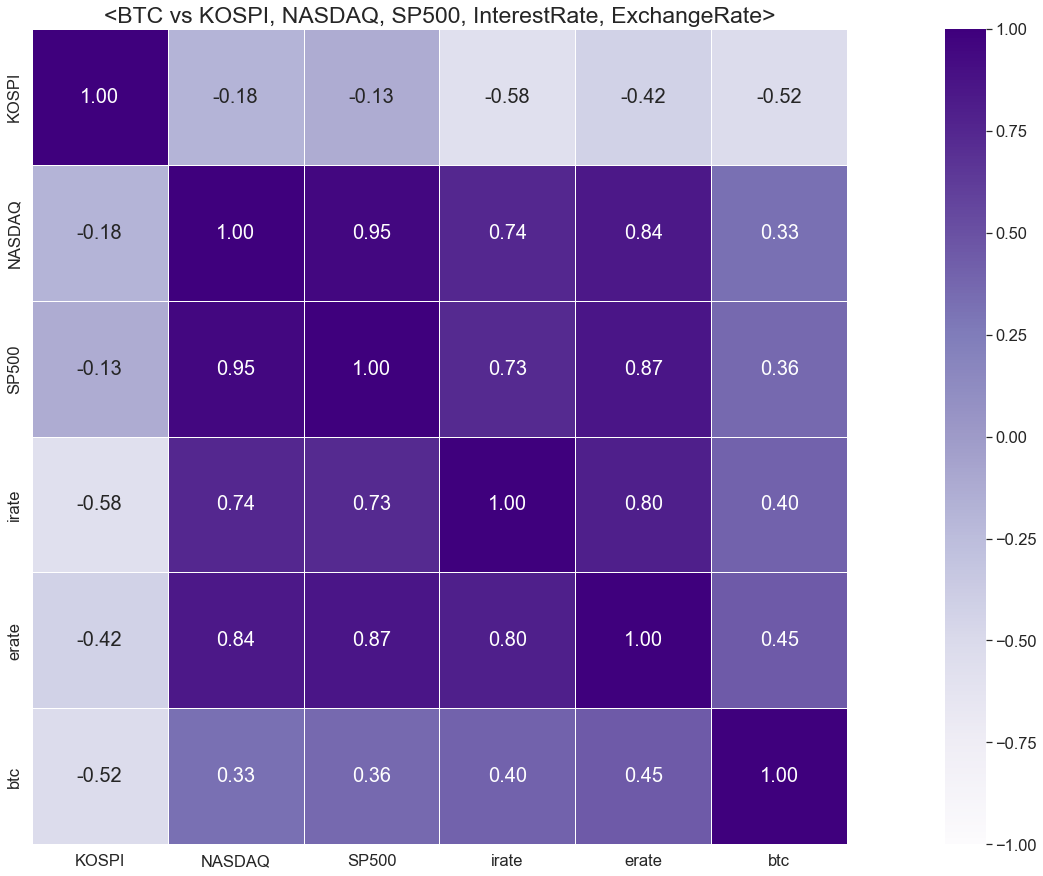

In [105]:
sns.heatmap(total_rate_btc,
            cmap = 'Purples', # Greys 색상으로 표시
            annot = True,   # 상관계수 값을 표시한다
            annot_kws={"size": 20},
            linewidths=.5,  # 경계면 구분하기
            fmt = '.2f', # 상관계수의 소수점 자리수  2자리로 지정
            #cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            square = True, # True로 설정 시 정사각형, False 설정 시 직사각형으로 설정
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )
plt.title("<BTC vs KOSPI, NASDAQ, SP500, InterestRate, ExchangeRate>", fontsize=23)
#sns.set(font_scale=1.5)
#plt.rc('axes', labelsize=20)
#plt.savefig("data/최종/btc_heatmap.png")
plt.show()